A NN for fashion_mnist data

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
%matplotlib inline 
plt.style.use('dark_background')

In [ ]:
dataset = keras.datasets.fashion_mnist

In [ ]:
(x_train, y_train), (x_test, y_test) = dataset.load_data()

In [ ]:
for i in [x_train, y_train, x_test, y_test]:
    print(i.shape)
m = x_train.shape[0]

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


Though the mnist data seem to be shuffled i will shuffle it again.

In [ ]:
# permut = tf.random.shuffle(tf.range(m))
# x_train = tf.gather(x_train, permut)
# y_train = tf.gather(y_train, permut)

In [ ]:
# Preprocessing data
x_train = keras.utils.normalize(x_train)

In [ ]:
def init():
    model = keras.Sequential([
                            keras.layers.Flatten(input_shape = (28, 28))
    ])
    n = [28*28, 128,  128,64, 10]
    model.add(keras.layers.Dense(n[1],  activation='relu'))
    model.add(keras.layers.Dropout(0.3))
    model.add(keras.layers.Dense(n[2],  activation='relu'))
    model.add(keras.layers.Dropout(0.3))
    model.add(keras.layers.Dense(n[3],  activation='relu'))
    model.add(keras.layers.Dense(n[-1]))
    return model

In [ ]:
alpha = 0.01
batchSize = 128
epochs = 100

In [ ]:
print(alpha)
model = init()
model.compile(
    optimizer= keras.optimizers.Adam(learning_rate=alpha),
    loss = tf.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['accuracy']
)

0.01


In [ ]:
 history = model.fit(x_train, y_train, 
                    batch_size=batchSize, epochs=epochs,
                    # validation_data=(x_test,y_test),
                    verbose=1)

Epoch 1/100
469/469 [==============================] - 2s 4ms/step - loss: 0.6361 - accuracy: 0.7644
Epoch 2/100
469/469 [==============================] - 2s 4ms/step - loss: 0.5073 - accuracy: 0.8210
Epoch 3/100
469/469 [==============================] - 2s 3ms/step - loss: 0.4823 - accuracy: 0.8285
Epoch 4/100
469/469 [==============================] - 2s 3ms/step - loss: 0.4676 - accuracy: 0.8329
Epoch 5/100
469/469 [==============================] - 2s 3ms/step - loss: 0.4602 - accuracy: 0.8371
Epoch 6/100
469/469 [==============================] - 2s 5ms/step - loss: 0.4425 - accuracy: 0.8444
Epoch 7/100
469/469 [==============================] - 1s 3ms/step - loss: 0.4446 - accuracy: 0.8433
Epoch 8/100
469/469 [==============================] - 2s 3ms/step - loss: 0.4333 - accuracy: 0.8462
Epoch 9/100
469/469 [==============================] - 1s 3ms/step - loss: 0.4263 - accuracy: 0.8487
Epoch 10/100
469/469 [==============================] - 1s 3ms/step - loss: 0.4308 - accura

In [ ]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 364.7664 - accuracy: 0.8074


[364.766357421875, 0.8073999881744385]

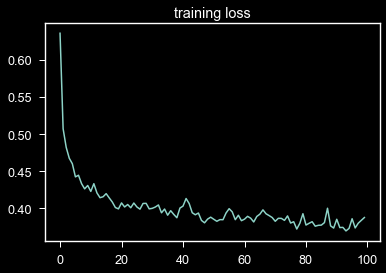

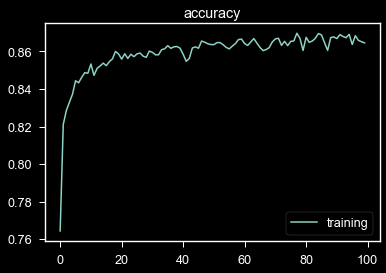

In [ ]:
historyDict = history.history
if 'loss' in historyDict:
    plt.plot(historyDict['loss'])
    plt.title('training loss')
    plt.show()
if 'val_loss' in historyDict:
    plt.plot(historyDict['val_loss'])
    plt.title('val loss')
    plt.show()
if 'accuracy' in historyDict:
    plt.plot(historyDict['accuracy'], label='training')
    if 'val_accuracy' in historyDict:
        plt.plot(historyDict['val_accuracy'], label='val')
    plt.legend()
    plt.title('accuracy')
    plt.show()